# IMPORTING LIBRARIES


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
import numpy as np
import matplotlib.style as style
from sklearn.tree import export_graphviz
import pydot
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets
from sklearn.preprocessing import scale 
plt.style.use('seaborn-white')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression, Ridge

%matplotlib inline
plt.style.use('seaborn-white')

from sklearn.datasets import make_regression
from sklearn.preprocessing import scale 
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [2]:
#Reading the CSV file (Since the file has almost 450000 rows therefore Chunksize has been used)
File = pd.read_csv('vehicles.csv', chunksize=10000)  # the number of rows per chunk

dfList = []
for df in File:
    dfList.append(df)

df = pd.concat(dfList,sort=False)

In [3]:
#Visualizing the first 5 rows using head method
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [4]:
#Getting the number of rows and columns using shape method
df.shape

(426880, 26)

In [5]:
#Dropping the extra columns
df= df.drop(columns=['region','state','id','posting_date','url','image_url', 'lat', 'long', 'region_url', 'description', 'county', 'VIN'], axis=1)

In [6]:
#Getting the list of columns
list(df)

['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [7]:
#Visualizing the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.6+ MB


# DATA CLEANING

In [8]:
#Creating the data frame of the null values
df_null=df.isnull().sum()
j=1
sum_tot=len(df)
df_null=pd.DataFrame(df_null,columns=['NULL VALUES'])
df_null['PERCENT']=(df_null['NULL VALUES']/sum_tot)*100
round(df_null,3).sort_values('PERCENT',ascending=False)

,NULL VALUES,PERCENT
size,306361,71.767
cylinders,177678,41.622
condition,174104,40.785
drive,130567,30.586
paint_color,130203,30.501
type,92858,21.753
manufacturer,17646,4.134
title_status,8242,1.931
model,5277,1.236
odometer,4400,1.031


In [9]:
#Eliminating the extreme values from price column
df[df.price == 0].shape
df[df.price > 100000].shape
df=df[(df.price < 100000) & (df.price >= 750 )]
df.shape

(381405, 14)

In [10]:
#Odometers higher than 300k and lower than 10, and models earlier than 1985 may not be good observations for a robust prediction:
df[df.odometer < 1000].shape
df[df.odometer < 1000].sample(10)
df[df.odometer >300000].shape
df=df[(df.odometer < 300000) & (df.odometer > 1000)]
df=df[df.year>1985]
df.shape

(359414, 14)

In [11]:
df['condition'].isnull().sum()

135423

In [12]:
df.loc[(df['year'] >= 2017)]['condition'].isnull().sum()

37041

In [13]:
#Value counts for different conditions
df.condition.value_counts()

good         112921
excellent     86558
like new      18341
fair           5132
new             634
salvage         405
Name: condition, dtype: int64

In [14]:
#Filling null values
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')
df.loc[df.year>=2017, 'condition'] = df.loc[df.year>=2017, 'condition'].fillna('like new')

In [15]:
df.condition.value_counts()

good         112921
excellent     86558
like new      42246
new           13770
fair           5132
salvage         405
Name: condition, dtype: int64

In [16]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 67177.19
Excellent average odometer: 109181.0
Good average odometer: 76770.11
Fair average odometer: 172105.98
Salvage average odometer: 139958.52


In [17]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].value_counts()

good         63570
like new     24853
excellent    19247
new          13013
fair           170
salvage         60
Name: condition, dtype: int64

In [18]:
#Filling Null Values for the odometer
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > excellent_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > excellent_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [19]:
df.cylinders.value_counts()

6 cylinders     82598
4 cylinders     67351
8 cylinders     58609
5 cylinders      1554
10 cylinders     1080
other             820
3 cylinders       520
12 cylinders      142
Name: cylinders, dtype: int64

In [20]:
#Filling the null values for other features using bfill and ffill
df['drive'] = df['drive'].fillna(method='bfill')
df['size'] = df['size'].fillna(method='bfill')
df['transmission'] = df['transmission'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')
df['title_status'] = df['title_status'].fillna(method='ffill')
df['fuel'] = df['fuel'].fillna(method='ffill')
df['size'] = df['size'].fillna(method='ffill')
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['manufacturer'] = df['manufacturer'].fillna(method='ffill')
df['model'] = df['model'].fillna(method='ffill')
df['type'] = df['type'].fillna(method='ffill')

In [21]:
#Confirming the null values have been filled
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [22]:
#Dataframe shows that there are no null values left
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0
transmission,0,0.0


In [23]:
df.sample(10)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
369267,1800,2008.0,ford,taurus sel,fair,6 cylinders,gas,156871.0,clean,automatic,rwd,full-size,sedan,black
412871,1500,1999.0,ford,ranger xlt 4x4,excellent,4 cylinders,gas,235647.0,clean,automatic,4wd,compact,convertible,blue
207224,22000,2010.0,lexus,is 250c,like new,6 cylinders,gas,45700.0,clean,automatic,rwd,mid-size,convertible,white
267977,29926,2018.0,ford,edge,like new,6 cylinders,gas,26926.0,clean,automatic,4wd,mid-size,SUV,grey
259417,8950,2003.0,infiniti,fx45 awd,excellent,8 cylinders,gas,128729.0,clean,automatic,4wd,mid-size,SUV,white
206687,22495,2014.0,ford,f-150 crew cab,excellent,6 cylinders,gas,99640.0,clean,automatic,4wd,full-size,truck,blue
228987,34998,2017.0,gmc,sierra sle crew cab short b,like new,4 cylinders,gas,82511.0,clean,automatic,4wd,full-size,sedan,grey
58595,11995,2016.0,chevrolet,malibu lt,like new,4 cylinders,gas,91435.0,clean,automatic,fwd,full-size,sedan,silver
77504,4500,2008.0,jeep,grand cherokee,excellent,6 cylinders,gas,190000.0,clean,automatic,4wd,full-size,sedan,silver
375107,19983,2015.0,bmw,3 series,like new,4 cylinders,gas,58132.0,clean,automatic,rwd,mid-size,sedan,black


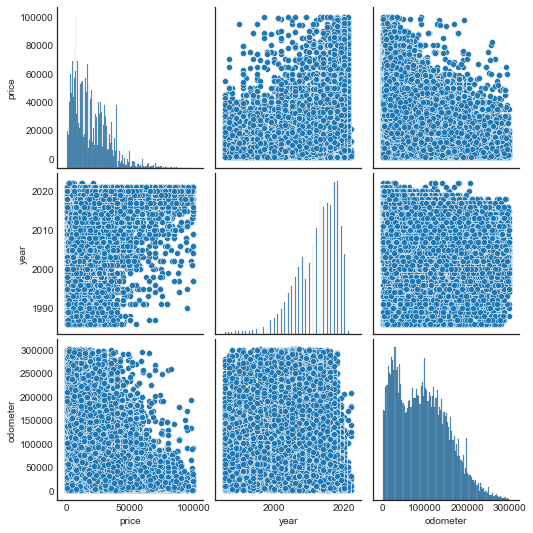

In [24]:
#Visualizations and comparison which shows the yearly, price and odometer comparison and variation
sns.pairplot(df)

In [25]:
df.set_index(['price', 'year']).head(10)

,,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
price,year,,,,,,,,,,,,
33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,rwd,full-size,pickup,white
22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,rwd,full-size,pickup,blue
39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,rwd,full-size,pickup,red
30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,rwd,full-size,pickup,red
15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black
27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,full-size,pickup,black
34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,full-size,pickup,silver
35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,full-size,truck,grey
29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red


In [26]:
df.sort_values('year').head(10)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
150163,4500,1986.0,mini,CJ7,good,6 cylinders,gas,3000.0,clean,manual,4wd,full-size,other,black
79711,900,1986.0,ford,bronco 2,good,6 cylinders,gas,80000.0,clean,automatic,4wd,compact,SUV,blue
405381,4500,1986.0,gmc,s15 p/u,excellent,6 cylinders,gas,161690.0,clean,automatic,4wd,full-size,pickup,blue
312458,5995,1986.0,pontiac,fiero gt,excellent,4 cylinders,gas,105000.0,clean,automatic,fwd,full-size,wagon,silver
11165,21500,1986.0,chevrolet,c10,excellent,6 cylinders,gas,104320.0,clean,automatic,rwd,mid-size,sedan,grey
425713,10000,1986.0,chevrolet,corvette,good,8 cylinders,gas,55500.0,clean,automatic,rwd,compact,hatchback,red
72043,39000,1986.0,volkswagen,vanagon westfalia,excellent,4 cylinders,gas,20000.0,clean,manual,rwd,full-size,van,custom
75531,8000,1986.0,gmc,c6000,good,8 cylinders,gas,59000.0,clean,automatic,rwd,full-size,truck,white
183772,5000,1986.0,toyota,Merz 500se,excellent,4 cylinders,gas,82000.0,clean,automatic,fwd,compact,pickup,black
272523,1800,1986.0,dodge,one ton,fair,8 cylinders,gas,50000.0,clean,automatic,rwd,full-size,van,brown


In [27]:
#Getting the column names
list(df)

['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

# LABEL ENCODING TO CONVERT FEATURES INTO NUMERIC

In [28]:
#Label Encoding
le = preprocessing.LabelEncoder()
df[['year','manufacturer', 'model', 'condition', 'cylinders','fuel','odometer','title_status', 'transmission','drive','size','type','paint_color']] = df[['year','manufacturer', 'model', 'condition','cylinders','fuel','odometer' ,'title_status', 'transmission','drive','size','type','paint_color']].apply(le.fit_transform)

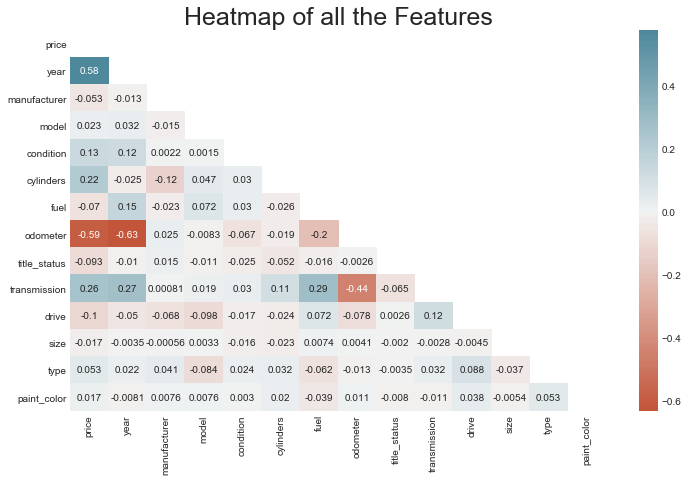

In [29]:
#Correlation between the features
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features", fontsize = 25);

# SPLITTING THE DATASET INTO TRAIN AND TEST

In [30]:
#Splitting The testing and training data

y= df.price
X= df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(287531, 13) (287531,)
(71883, 13) (71883,)


# SCALING THE DATA

In [31]:
#Feature Scaling
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [32]:
X_test

array([[0.63888889, 0.3       , 0.53983118, ..., 0.33333333, 0.75      ,
        0.        ],
       [0.91666667, 0.475     , 0.31974132, ..., 0.66666667, 0.58333333,
        0.81818182],
       [0.63888889, 0.375     , 0.32784613, ..., 0.66666667, 0.75      ,
        0.81818182],
       ...,
       [0.86111111, 0.3       , 0.43106706, ..., 0.33333333, 0.        ,
        0.81818182],
       [0.75      , 0.225     , 0.38222819, ..., 0.        , 0.75      ,
        0.90909091],
       [0.5       , 0.175     , 0.83622391, ..., 0.33333333, 0.33333333,
        0.90909091]])

# RANDOM FOREST REGRESSOR

In [33]:
#Making predictions using Random Forest with 20 estimators
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy_rf= regressor.score(X_test,y_test)
print("Accuracy:", round(accuracy_rf*100,2),'%')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))


Accuracy: 88.52 %
Mean Absolute Error: 2407.9
Mean Squared Error: 22967137.46
Root Mean Squared Error: 4792.4


In [34]:
# Creating dataframe of predicted and actual price with 20 estimators
df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_rf.tail(7)
round(df1,2)

,Actual,Predicted
353926,20590,20590.00
229380,11980,11930.95
417510,35590,36270.00
414672,24999,25348.10
207053,14999,19762.10
66463,8599,11388.80
160197,17000,15833.45


In [35]:
#Mean squared error for Random Forest with 20 estimators
mae_rf=print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
mse_rf=print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
rmse_rf=print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2407.9
Mean Squared Error: 22967137.46
Root Mean Squared Error: 4792.4


# RANDOM FOREST REGRESSOR WITH 200 N ESTIMATORS

In [36]:
#Increasing n estimators to 200 for Random Forest
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test,y_test)
print("Accuracy:", round(accuracy*100,2),'%')

Accuracy: 89.02 %


In [37]:
# Creating dataframe of predicted and actual price with 200 estimators
df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_rf.head(10)
round(df1,2)

,Actual,Predicted
348281,9998,8592.37
219730,27590,27590.00
181635,4000,4000.00
404124,14999,14072.36
136313,11998,10981.10
403636,59999,59801.60
361110,23900,13821.61
270953,14950,15096.50
268358,38990,38990.00
180900,10800,9952.18


In [38]:
#Mean squared error for Random Forest with 200 estimators
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2318.29
Mean Squared Error: 21967342.26
Root Mean Squared Error: 4686.93


In [39]:
# Visualizing a Single Decision Tree
rf= regressor
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

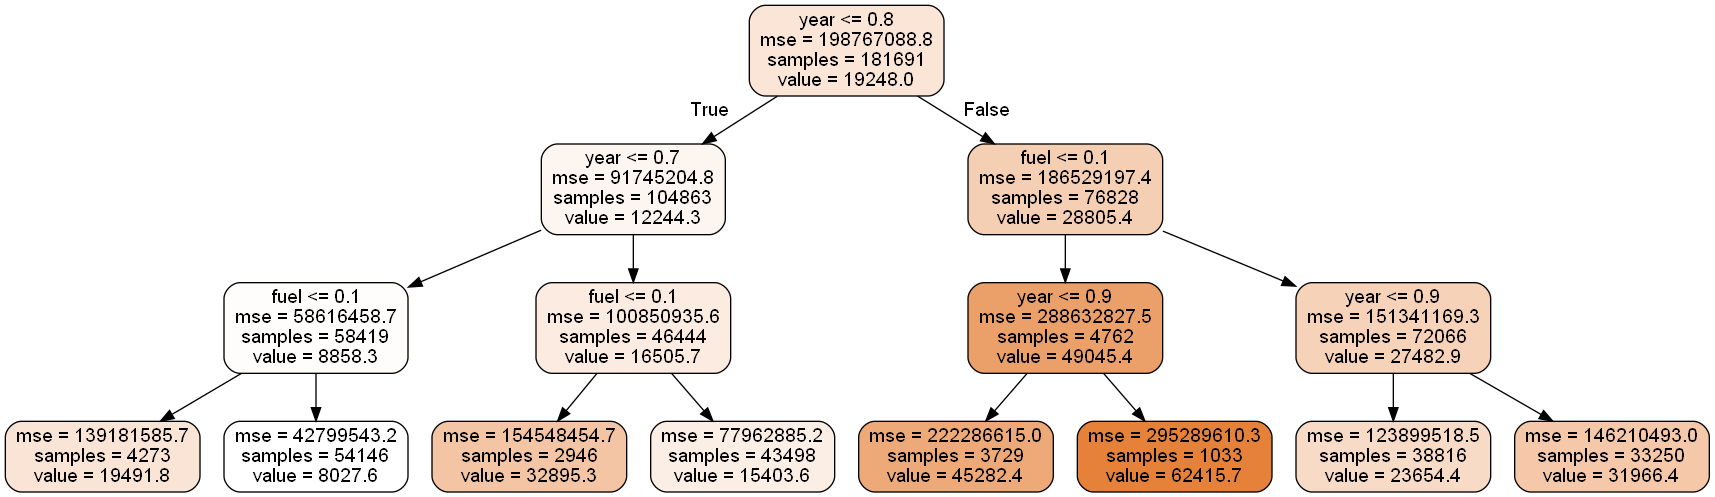

In [40]:
# Display the Decision Tree
from IPython.display import Image
Image(filename = 'small_tree.png')

# FEATURE IMPORTANCE

In [41]:
#FEATURE IMPORTANCE
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year                 Importance: 0.44
Variable: odometer             Importance: 0.12
Variable: model                Importance: 0.11
Variable: fuel                 Importance: 0.11
Variable: manufacturer         Importance: 0.05
Variable: drive                Importance: 0.05
Variable: cylinders            Importance: 0.04
Variable: type                 Importance: 0.03
Variable: condition            Importance: 0.02
Variable: title_status         Importance: 0.01
Variable: transmission         Importance: 0.01
Variable: size                 Importance: 0.01
Variable: paint_color          Importance: 0.01


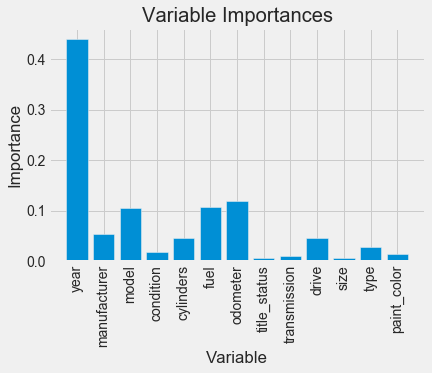

In [42]:
#Dispaying the graph for feature importance
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

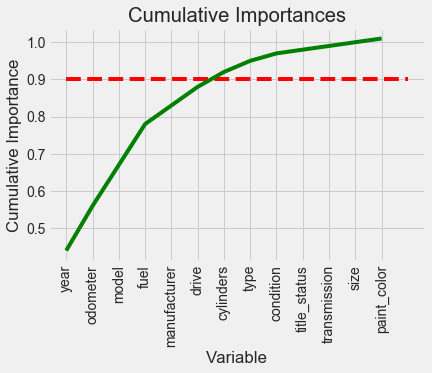

In [43]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [44]:
# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 7


# RANDOM FOREST WITH BEST FEATURES

In [45]:
# New random forest with only the most important variables
rf_most_important = RandomForestRegressor(n_estimators=20, random_state=0)

In [46]:
# Extract the most important features
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


important_indices = [feature_list.index('year'), feature_list.index('drive'), 
                     feature_list.index('odometer'), feature_list.index('fuel'),
                     feature_list.index('model'), feature_list.index('cylinders'), feature_list.index('manufacturer')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

In [47]:
# Train the random forest with important features
rf_most_important.fit(train_important, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [48]:
#Making predictions using important features
predictions = rf_most_important.predict(test_important)
#Accuracy of important features model
accuracy = rf_most_important.score(test_important,y_test)
print("Accuracy:", round(accuracy*100,2),'%')

Accuracy: 88.97 %


In [49]:
#Comparing predicted values and Actual value using important feature model
df_rf_imp = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df100 = df_rf_imp.head(10)
round(df100,2)

,Actual,Predicted
348281,9998,7743.05
219730,27590,27590.00
181635,4000,4000.00
404124,14999,14724.05
136313,11998,10144.25
403636,59999,59448.15
361110,23900,11822.65
270953,14950,12867.65
268358,38990,38990.00
180900,10800,8705.00


In [50]:
#Mean squared error for model with important features
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 2270.89
Mean Squared Error: 22068393.47
Root Mean Squared Error: 4697.7


# LINEAR REGRESSION AND RIDGE REGRESSION

In [51]:
#Linear Regression and Ridge Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(MSE(y_test, y_pred_lr))
rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
rmse_rr = np.sqrt(MSE(y_test, y_pred_rr))
print('-------------Linear Regression-------------')
print("RMSE = {:.2f}".format((rmse_lr)))
accuracy_lr = lr.score(X_test,y_test)
print('Accuracy = ', accuracy_lr*100,'%')
print('-------------Ridge Regression--------------')
accuracy_rr=rr.score(X_test,y_test)
print("RMSE = {:.2f}".format((rmse_rr)))
print('Accuracy= ', accuracy_rr*100,'%')


-------------Linear Regression-------------
RMSE = 9740.60
Accuracy =  52.56839365560615 %
-------------Ridge Regression--------------
RMSE = 9740.60
Accuracy=  52.56841269957913 %


In [52]:
#Actual vs Predicted
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
round(df_lr.head(10),2)

,Actual,Predicted
348281,9998,18662.16
219730,27590,37127.73
181635,4000,3030.59
404124,14999,9370.48
136313,11998,16063.92
403636,59999,41646.80
361110,23900,7733.63
270953,14950,21307.27
268358,38990,26301.43
180900,10800,18948.55


In [53]:
#Printing Mean squared error
OLS_pred= lr.predict(X_test)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, OLS_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, OLS_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, OLS_pred)),2))

Mean Absolute Error: 7055.01
Mean Squared Error: 94879254.58
Root Mean Squared Error: 9740.6


In [54]:
#To retrieve the intercept:
print(lr.intercept_)#For retrieving the slope:
print(lr.coef_)

5552.888131597865
[ 28044.83445893  -1316.78835608    205.58691471   2671.51163976
  15812.94336653 -15003.63631328 -19640.52403698  -7577.38392285
   1101.89663888  -4049.15447705   -456.74112856   1227.09191609
    557.86947704]


In [55]:
#Coeffeicients for Linear Regression
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
year,28044.834459
manufacturer,-1316.788356
model,205.586915
condition,2671.511640
cylinders,15812.943367
fuel,-15003.636313
odometer,-19640.524037
title_status,-7577.383923
transmission,1101.896639
drive,-4049.154477


Text(0, 0.5, 'weights')

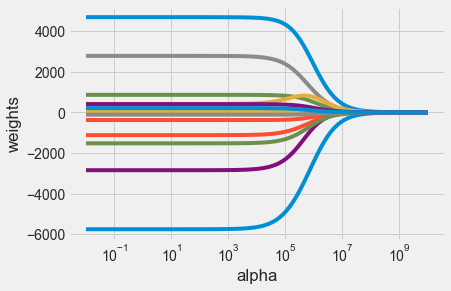

In [56]:
#Calculating Alpha and visualizing for the Ridge regression
alphas = 10**np.linspace(10,-2,100)*0.5
y_pred = regressor.predict(X_test)
#Alpha for Ridge

clf= Ridge()
coefs = []

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(scale(X_train), y_train)
    coefs.append(clf.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [57]:
# Calculating ALPHA for ridge regression
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

In [58]:
# Fit a ridge regression on the training data
pred2 = ridgecv.predict(X_test)
# Use this model to predict the test data
print(pd.Series(ridgecv.coef_, index = X.columns))

year            27991.521429
manufacturer    -1316.032599
model             205.697048
condition        2667.395182
cylinders       15735.943672
fuel           -14907.666407
odometer       -19533.560787
title_status    -7538.512827
transmission     1128.674311
drive           -4030.918378
size             -456.932851
type             1224.897642
paint_color       556.396920
dtype: float64


In [59]:
#Mean squared error for Ridge Regression
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred2),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred2),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))

Mean Absolute Error: 7054.24
Mean Squared Error: 94880668.3
Root Mean Squared Error: 9740.67


Text(0.5, 1.0, 'Feature importance using Ridge Model')

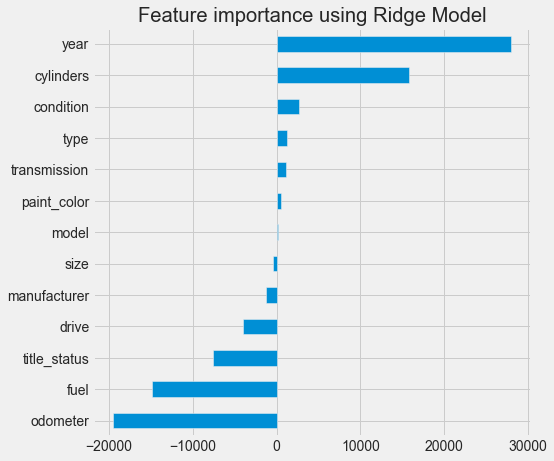

In [60]:
#Feature Importance for Ridge Regression
coef_ridge= pd.Series(ridgecv.coef_, index = X.columns)
imp_coef = coef_ridge.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

# K NEAREST NEIGBORS

In [61]:
#Making predictions using KNN
rmse_val2 = [] #to store rmse values for different k
for K in range(8):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8035.965445982635
RMSE value for k=  2 is: 7334.865921348364
RMSE value for k=  3 is: 7138.009793874964
RMSE value for k=  4 is: 7077.461904842671
RMSE value for k=  5 is: 7071.008356572741
RMSE value for k=  6 is: 7082.555451836916
RMSE value for k=  7 is: 7100.000079540602
RMSE value for k=  8 is: 7117.253229373173


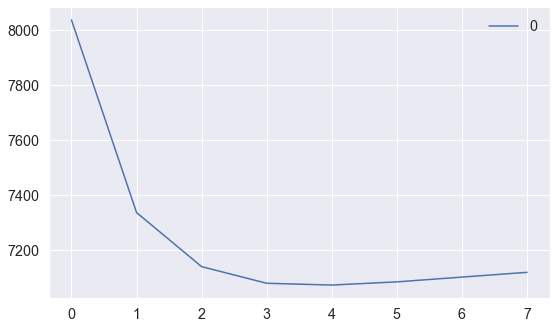

In [62]:
#plotting the rmse values against k values
sns.set(font_scale=1.3)
curve = pd.DataFrame(rmse_val2) #Elbow curve 
curve.plot(figsize=(8,5))

In [63]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [64]:
# Model Accuracy for KNN
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.22433676947261522


In [65]:
#Results for KNN 
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
accuracy_k = knn.score(X_test,y_test)
print("Accuracy:", round(accuracy_k*100,2),'%')

Mean Absolute Error: 4845.77
Mean Squared Error: 75598680.03
Root Mean Squared Error: 8694.75
Accuracy: 22.43 %


In [66]:
#Predicting Values using KNN
df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_knn.head(25)
round(df_knn.head(5),2)

,Actual,Predicted
348281,9998,4994
219730,27590,27590
181635,4000,4000
404124,14999,10000
136313,11998,9295


# XGBOOST

In [67]:
#Using XGB Booster 3-fold cross validation was performed. Max depth was chosen as 5. So that the model was kept simple. Finally, the number of times is set to perform boosting as 10.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse_xgb))

[21:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 12619.609727


In [68]:
# fit XGB model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 200)

xg_reg.fit(X_train,y_train)

predictions = xg_reg.predict(X_test)
accuracy_xgb = xg_reg.score(X_test,y_test)
print("Accuracy:", round(accuracy_xgb*100,2),'%')

[21:27:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 81.42 %


In [70]:
#Prediction vs actual
df_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_xgb.head(25)
round(df_xgb.head(5),2)

,Actual,Predicted
348281,9998,6877.890137
219730,27590,32604.619141
181635,4000,3652.280029
404124,14999,11317.160156
136313,11998,13406.370117


[21:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


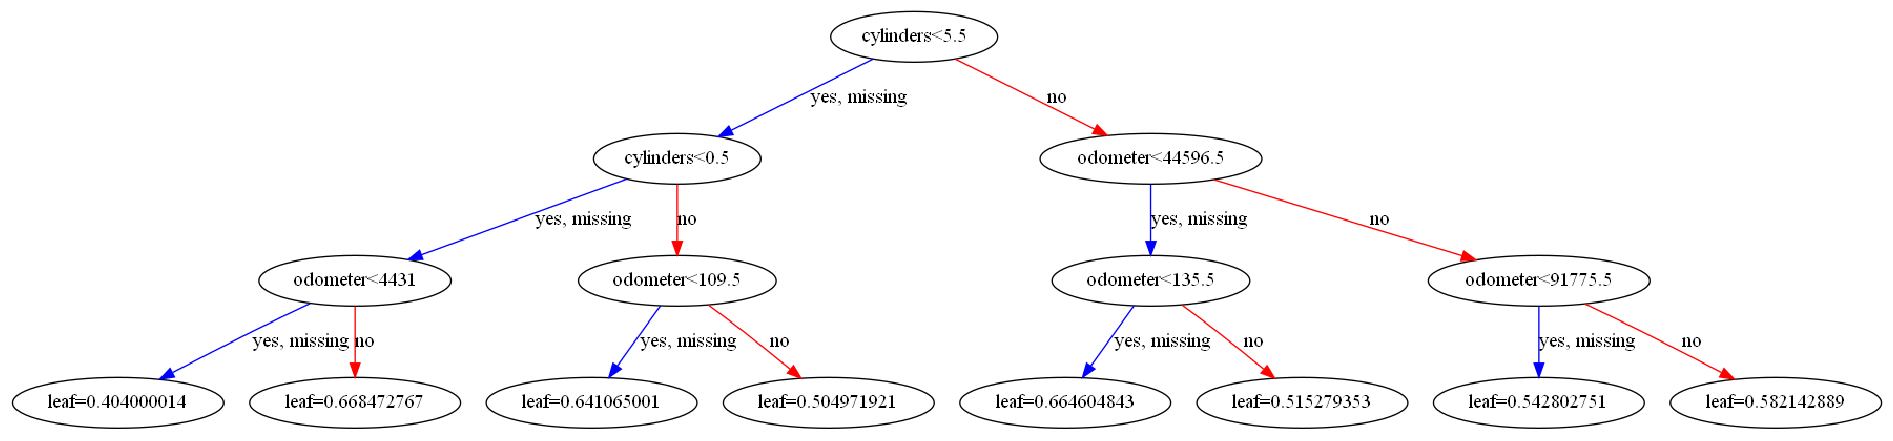

In [72]:
#Decision Tree for XGB boost
A, b = X.iloc[:,:-1],X.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=A,label=b)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30,40]
plt.show()


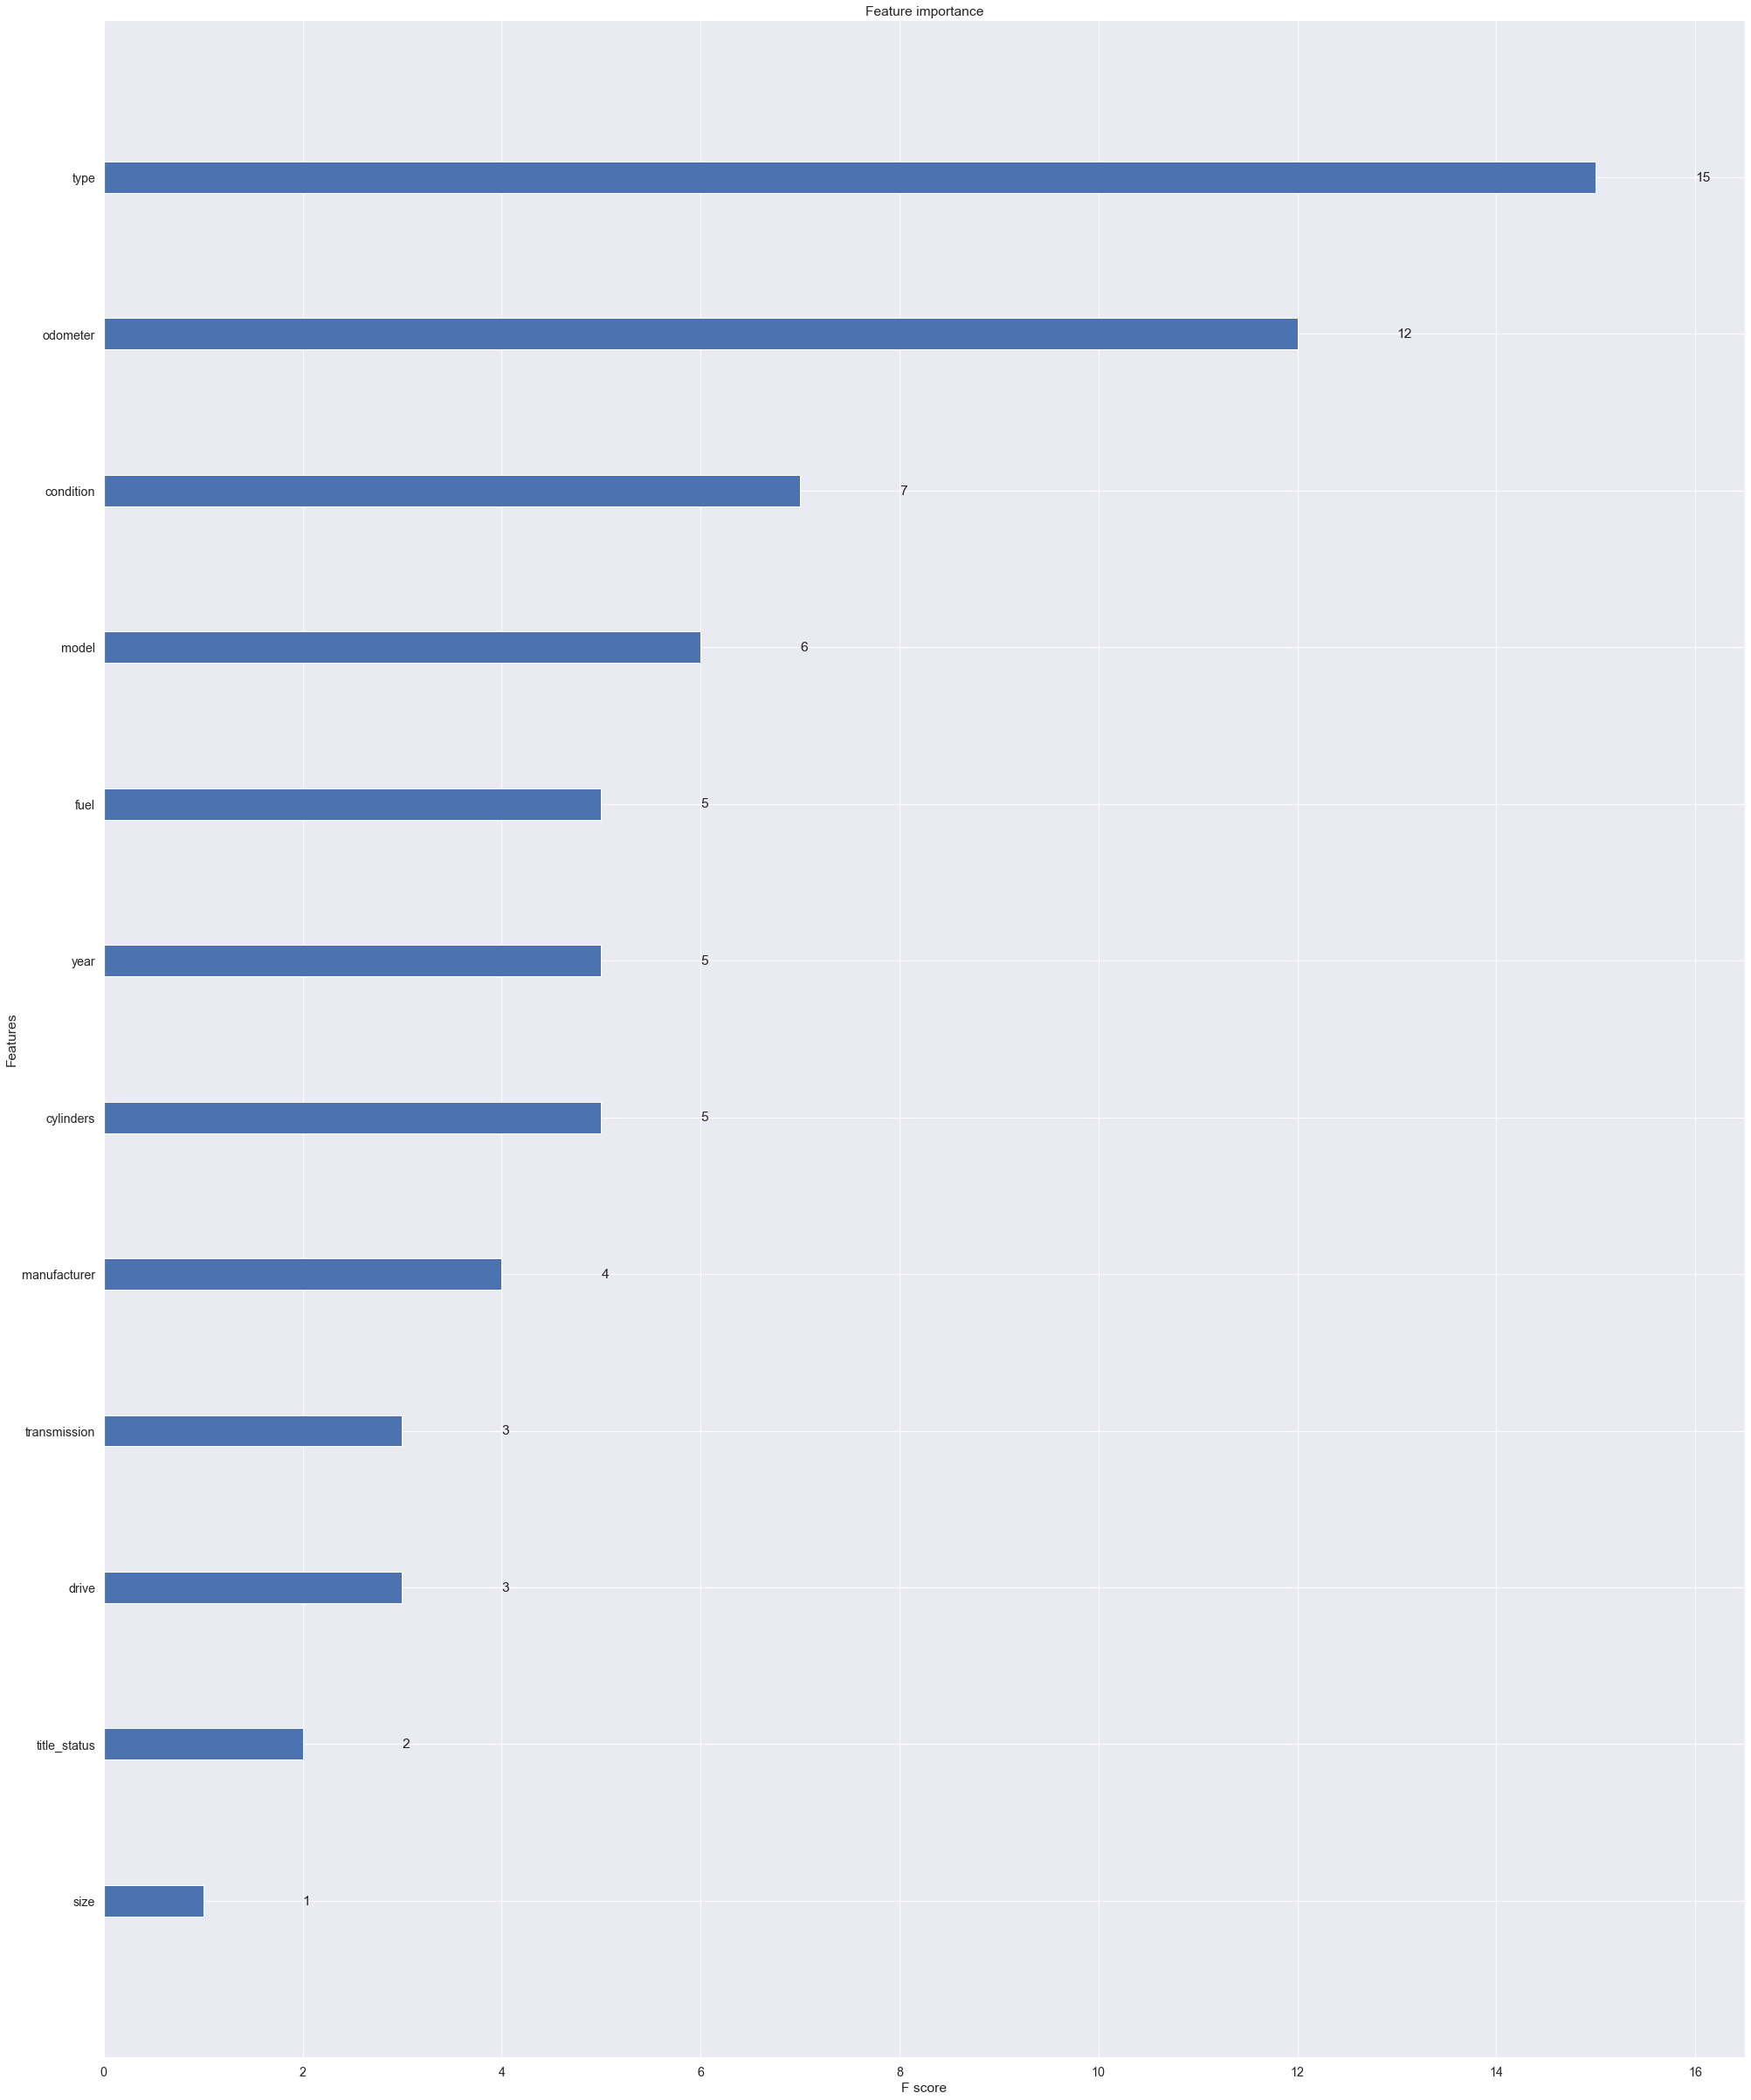

In [73]:
#Feature Importance for XGB boost apart from decision tree
xgb.plot_importance(xg_reg)
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

# FINAL RESULTS AND ACCURACIES

In [74]:
print('-----------RANDOM FOREST REGRESSOR-----------')
print("Accuracy:", round(accuracy_rf*100,2),'%')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('-------------LINEAR REGRESSION----------------')
print('Accuracy = ', round(accuracy_lr*100,2),'%')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, OLS_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, OLS_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, OLS_pred)),2))
print('-------------RIDGE REGRESSION-----------------')
print('Accuracy= ', round(accuracy_rr*100,2),'%')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred2),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred2),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))
print('-------------------KNN------------------------')
print("Accuracy:", round(accuracy_k*100,2),'%')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('-----------------XGBOOST-----------------------')
print("Accuracy:", round(accuracy_xgb*100,2),'%')
print("Root Mean Squared Error: %f" % (rmse_xgb))

-----------RANDOM FOREST REGRESSOR-----------
Accuracy: 88.52 %
Mean Absolute Error: 4845.77
Mean Squared Error: 75598680.03
Root Mean Squared Error: 8694.75
-------------LINEAR REGRESSION----------------
Accuracy =  52.57 %
Mean Absolute Error: 7055.01
Mean Squared Error: 94879254.58
Root Mean Squared Error: 9740.6
-------------RIDGE REGRESSION-----------------
Accuracy=  52.57 %
Mean Absolute Error: 7054.24
Mean Squared Error: 94880668.3
Root Mean Squared Error: 9740.67
-------------------KNN------------------------
Accuracy: 22.43 %
Mean Absolute Error: 4845.77
Mean Squared Error: 75598680.03
Root Mean Squared Error: 8694.75
-----------------XGBOOST-----------------------
Accuracy: 81.42 %
Root Mean Squared Error: 12619.609727
